**# Introduction**

* The next project is based on the kaggle dataset "Logistic regression To predict heart disease" and you can find it in this [link](https://www.kaggle.com/dileep070/heart-disease-prediction-using-logistic-regression)

* The goal of this project is to have a better understanding on the factors that rise the probability of heart disease.

* The features are correctly described in the kaggle dataset.

* We will use some Logistic models in order to predict the probability of have heart problems.

#Let's import our libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 


Let's collect the data from kaggle


In [2]:
!pip install -q kaggle

In [3]:
#Choice our kaggle.json downloaded file
from google.colab import files
files.upload()

#Make directory named kaggle and copy kaggle.json file there.
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/


Saving kaggle.json to kaggle (3).json
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [4]:
 ! chmod 600 ~/.kaggle/kaggle.json #Change the permissions of the file.

In [5]:
! kaggle datasets list #- That's all ! You can check if everything's okay by running this command.

ref                                                               title                                                 size  lastUpdated          downloadCount  
----------------------------------------------------------------  --------------------------------------------------  ------  -------------------  -------------  
nehaprabhavalkar/indian-food-101                                  Indian Food 101                                        7KB  2020-09-30 06:23:43           3396  
christianlillelund/donald-trumps-rallies                          Donald Trump's Rallies                               720KB  2020-09-26 10:25:08            907  
heeraldedhia/groceries-dataset                                    Groceries dataset                                    257KB  2020-09-17 04:36:08           4256  
andrewmvd/trip-advisor-hotel-reviews                              Trip Advisor Hotel Reviews                             5MB  2020-09-30 08:31:20           2417  
balraj98/stanford-back

In [6]:
! kaggle datasets download -d dileep070/heart-disease-prediction-using-logistic-regression

! mkdir Logistic_reg_heart_disease_project_dataset
#! cp heart-disease-prediction-using-logistic-regression.zip /Logistic_reg_heart_disease_project_datase/
! unzip heart-disease-prediction-using-logistic-regression.zip -d Logistic_reg_heart_disease_project_dataset


heart-disease-prediction-using-logistic-regression.zip: Skipping, found more recently modified local copy (use --force to force download)
mkdir: cannot create directory ‘Logistic_reg_heart_disease_project_dataset’: File exists
Archive:  heart-disease-prediction-using-logistic-regression.zip
replace Logistic_reg_heart_disease_project_dataset/framingham.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [7]:
!echo $PATH
!ls

/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin:/opt/bin
 heart-disease-prediction-using-logistic-regression.zip
'kaggle (1).json'
'kaggle (2).json'
'kaggle (3).json'
 kaggle.json
 Logistic_reg_heart_disease_project_dataset
 sample_data


In [8]:
!cd Logistic_reg_heart_disease_project_dataset

In [9]:
!ls Logistic_reg_heart_disease_project_dataset


framingham.csv


In [10]:
path = 'Logistic_reg_heart_disease_project_dataset/framingham.csv'

In [52]:
#Reading the saved dataset
dataset = pd.read_csv(path)


In [53]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


* # Data Cleaning 

* Let's see correlations between our features, this could help us with the data cleaning process.

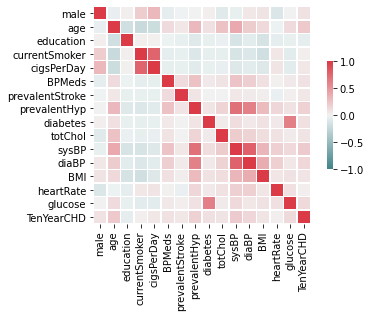

In [54]:
#See correlations 
cmap = sns.diverging_palette(200,10,as_cmap=True)
sns.heatmap(dataset.corr(), vmax=1,vmin=-1, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Since we don't have info about what "education" feature is about, I'll delete it from our dataset.

In [55]:
dataset = dataset.drop(["education"], axis=1)

In [56]:
dataset.shape

(4238, 15)

## Let's Take Care of the cigsPerDay feature
* For this feature we'll set the instance to 0.0 if the person is not a current smoker (currentSmoker == 0), otherwise, the instance will be set to 20.0 (the most common value) 


In [57]:
#Fill our missing data with 20.0
#we'll take care of the values where the person is a currentSmoker later
dataset['cigsPerDay'] = dataset['cigsPerDay'].fillna(20.0)


In [58]:
dataset['cigsPerDay'].describe()

count    4238.000000
mean        9.078339
std        11.913780
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        70.000000
Name: cigsPerDay, dtype: float64

In [59]:
#If our the instance is a currentSmoker, fill the cigsPerDay with a 0
dataset['cigsPerDay'] = dataset.apply(lambda x: 0.0 if x["currentSmoker"]==0 else x['cigsPerDay'], axis=1)

In [60]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   currentSmoker    4238 non-null   int64  
 3   cigsPerDay       4238 non-null   float64
 4   BPMeds           4185 non-null   float64
 5   prevalentStroke  4238 non-null   int64  
 6   prevalentHyp     4238 non-null   int64  
 7   diabetes         4238 non-null   int64  
 8   totChol          4188 non-null   float64
 9   sysBP            4238 non-null   float64
 10  diaBP            4238 non-null   float64
 11  BMI              4219 non-null   float64
 12  heartRate        4237 non-null   float64
 13  glucose          3850 non-null   float64
 14  TenYearCHD       4238 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 496.8 KB


## Let's take Care of the BPMeds missing values

In [61]:
from sklearn.impute import SimpleImputer

In [62]:
BPMeds_imputer = SimpleImputer(strategy='constant', fill_value=0)

In [63]:
dataset['BPMeds'] = BPMeds_imputer.fit_transform(dataset['BPMeds'].values.reshape(-1, 1))

In [64]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   currentSmoker    4238 non-null   int64  
 3   cigsPerDay       4238 non-null   float64
 4   BPMeds           4238 non-null   float64
 5   prevalentStroke  4238 non-null   int64  
 6   prevalentHyp     4238 non-null   int64  
 7   diabetes         4238 non-null   int64  
 8   totChol          4188 non-null   float64
 9   sysBP            4238 non-null   float64
 10  diaBP            4238 non-null   float64
 11  BMI              4219 non-null   float64
 12  heartRate        4237 non-null   float64
 13  glucose          3850 non-null   float64
 14  TenYearCHD       4238 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 496.8 KB


## Taking care of the totChol missing values

In [65]:
TotChol_imputer = SimpleImputer(strategy='mean')

In [66]:
dataset['totChol'] = TotChol_imputer.fit_transform(dataset['totChol'].values.reshape(-1, 1))

In [67]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   currentSmoker    4238 non-null   int64  
 3   cigsPerDay       4238 non-null   float64
 4   BPMeds           4238 non-null   float64
 5   prevalentStroke  4238 non-null   int64  
 6   prevalentHyp     4238 non-null   int64  
 7   diabetes         4238 non-null   int64  
 8   totChol          4238 non-null   float64
 9   sysBP            4238 non-null   float64
 10  diaBP            4238 non-null   float64
 11  BMI              4219 non-null   float64
 12  heartRate        4237 non-null   float64
 13  glucose          3850 non-null   float64
 14  TenYearCHD       4238 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 496.8 KB


## Taking care of the BMI missing values

In [69]:
BMI_imputer = SimpleImputer(strategy='mean')
dataset['BMI'] = BMI_imputer.fit_transform(dataset['BMI'].values.reshape(-1, 1))

In [70]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   currentSmoker    4238 non-null   int64  
 3   cigsPerDay       4238 non-null   float64
 4   BPMeds           4238 non-null   float64
 5   prevalentStroke  4238 non-null   int64  
 6   prevalentHyp     4238 non-null   int64  
 7   diabetes         4238 non-null   int64  
 8   totChol          4238 non-null   float64
 9   sysBP            4238 non-null   float64
 10  diaBP            4238 non-null   float64
 11  BMI              4238 non-null   float64
 12  heartRate        4237 non-null   float64
 13  glucose          3850 non-null   float64
 14  TenYearCHD       4238 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 496.8 KB


## Using the same imputer for heartRate and glucose.


In [71]:
dataset['heartRate'] = BMI_imputer.fit_transform(dataset['heartRate'].values.reshape(-1, 1))
dataset['glucose'] = BMI_imputer.fit_transform(dataset['glucose'].values.reshape(-1, 1))

In [72]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   currentSmoker    4238 non-null   int64  
 3   cigsPerDay       4238 non-null   float64
 4   BPMeds           4238 non-null   float64
 5   prevalentStroke  4238 non-null   int64  
 6   prevalentHyp     4238 non-null   int64  
 7   diabetes         4238 non-null   int64  
 8   totChol          4238 non-null   float64
 9   sysBP            4238 non-null   float64
 10  diaBP            4238 non-null   float64
 11  BMI              4238 non-null   float64
 12  heartRate        4238 non-null   float64
 13  glucose          4238 non-null   float64
 14  TenYearCHD       4238 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 496.8 KB
